In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('googleplay.csv')
df1 = pd.read_csv('test.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].


# download pretrained GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
X = Imputer(missing_values='NaN', strategy='mean', axis=0).fit(X).transform(X)
X = StandardScaler().fit(X).transform(X)


labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**MULTILAYER** **PERCEPTRON**

In [ ]:
!pip install keras --upgrade
import keras
from keras.models import Sequential
from keras.layers import Dense

try:
    import pydot
except:
    !pip install pydot
    
try:
    import graphviz
except:
    !apt-get install graphviz -y
    
from keras.utils.vis_utils import plot_model
from IPython.display import Image

keras.__version__

# New Section

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                11712     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 12,241
Trainable params: 12,241
Non-trainable params: 0
_________________________________________________________________
None


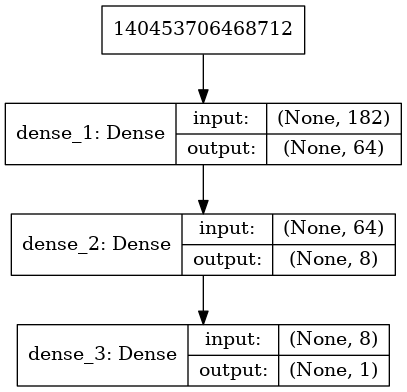

In [ ]:

clf = Sequential()


clf.add(Dense(units=64, 
              kernel_initializer='uniform',
              activation='relu', 
              input_dim=X.shape[1]))

clf.add(Dense(units=8, 
              kernel_initializer='uniform', 
              activation='relu'))

# the last hidden layer for output
clf.add(Dense(units=1, 
              kernel_initializer='uniform', 
              activation='sigmoid'))


clf.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])


print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

In [ ]:
#  model
history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=100,
                    epochs=20, 
                    verbose=1)

In [ ]:
# we use the trained model to predict the label of UTKAL REVIEWS test set
y_pred = clf.predict(X_test)
y_pred = [1 if i[0] > 0.5 else 0 for i in y_pred]

# performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[658  21]
 [ 89  32]]


In [ ]:

!pip install pycm
from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(cm)

In [ ]:
from sklearn import datasets

df_bc = datasets.load_googleplay()
X = df_bc['data']
y = df_bc['test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = Sequential()
clf.add(Dense(units=16, 
              kernel_initializer='uniform',
              activation='relu', 
              input_dim=X.shape[1]))
clf.add(Dense(units=16, 
              kernel_initializer='uniform', 
              activation='relu'))
clf.add(Dense(units=1, 
              kernel_initializer='uniform', 
              activation='sigmoid'))
clf.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])
print(clf.summary())

history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=100,
                    epochs=50, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

y_pred = clf.predict(X_test)
y_pred = [1 if i[0] > 0.5 else 0 for i in y_pred]

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(cm)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3840 - acc: 0.8904 - val_loss: 0.1823 - val_acc: 0.9472
Epoch 2/10
 - 2s - loss: 0.1452 - acc: 0.9566 - val_loss: 0.1224 - val_acc: 0.9664
Epoch 3/10
 - 2s - loss: 0.0971 - acc: 0.9712 - val_loss: 0.1097 - val_acc: 0.9665
Epoch 4/10
 - 2s - loss: 0.0677 - acc: 0.9801 - val_loss: 0.1060 - val_acc: 0.9690
Epoch 5/10
 - 2s - loss: 0.0529 - acc: 0.9837 - val_loss: 0.0909 - val_acc: 0.9728
Epoch 6/10
 - 2s - loss: 0.0365 - acc: 0.9889 - val_loss: 0.0889 - val_acc: 0.9746
Epoch 7/10
 - 2s - loss: 0.0311 - acc: 0.9906 - val_loss: 0.0856 - val_acc: 0.9753
Epoch 8/10
 - 2s - loss: 0.0225 - acc: 0.9936 - val_loss: 0.0882 - val_acc: 0.9757
Epoch 9/10
 - 2s - loss: 0.0174 - acc: 0.9948 - val_loss: 0.0859 - val_acc: 0.9769
Epoch 10/10
 - 2s - loss: 0.0126 - acc: 0.9965 - val_loss: 0.0842 - val_acc: 0.9784


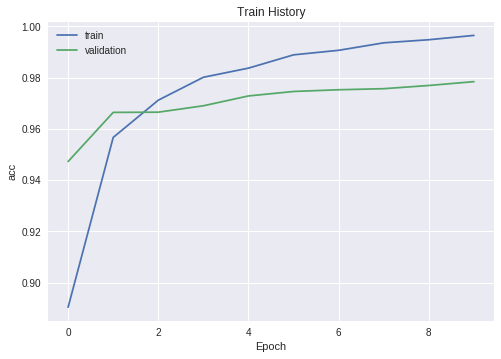

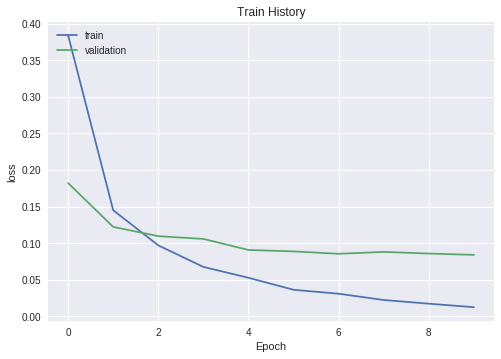

10000/10000 [==============================] - 0s 35us/step
Accuracy of testing data = 97.8%


In [ ]:
# UTKAL REVIEWS TEST DATA


clf.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = clf.fit(x=X_train, y=y_train, 
                    validation_split=0.2,  
                    batch_size=200, 
                    epochs=10,
                    verbose=2)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = clf.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


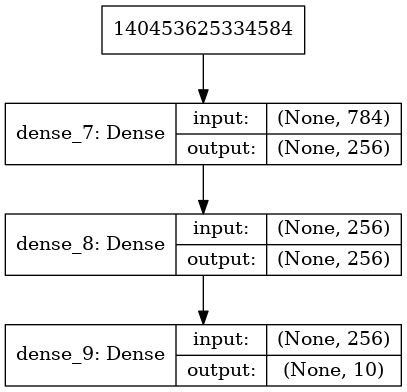

In [ ]:
clf = Sequential()
clf.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
clf.add(Dense(units=256, 
                input_dim=64, 
                kernel_initializer='normal', 
                activation='relu'))
clf.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        5020      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 980)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               98100     
__________

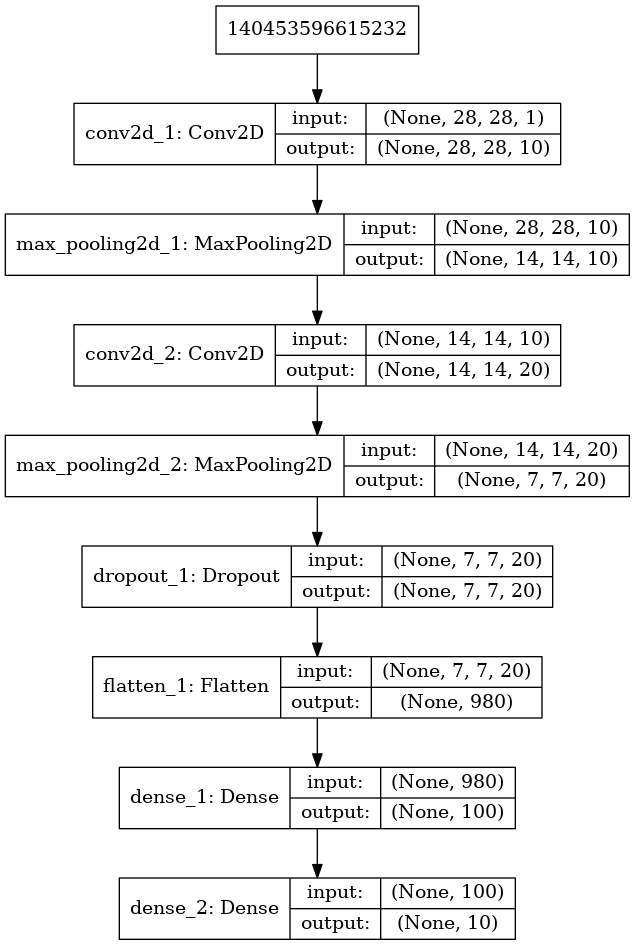

In [ ]:
from keras.layers import Dropout, Flatten, Conv2D, MaxPool2D 

(X_train, y_train), (X_test, y_test) = mnist.load_data()  
  
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train = X_train / 255  
X_test = X_test /255  
  
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

clf = Sequential()  
clf.add(Conv2D(filters=10,  
                 kernel_size=(5, 5),  
                 padding='same',  
                 input_shape=(28, 28, 1),  
                 activation='relu',
                 name='conv2d_1')) 
clf.add(MaxPool2D(pool_size=(2,2), 
                    name='max_pooling2d_1'))  
clf.add(Conv2D(filters=20,  
                 kernel_size=(5, 5),  
                 padding='same',  
                 input_shape=(28, 28, 1),  
                 activation='relu',
                 name='conv2d_2'))  
clf.add(MaxPool2D(pool_size=(2,2), 
                    name='max_pooling2d_2'))  
clf.add(Dropout(0.25, name='dropout_1'))
clf.add(Flatten(name='flatten_1'))
clf.add(Dense(100, activation='relu', name='dense_1'))  
#clf.add(Dropout(0.5, name='dropout_2'))
clf.add(Dense(10, activation='softmax', name='dense_2'))
print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = gps.load_data()

X_train = X_train.reshape(60000, 28*28).astype('float32')
X_test = X_test.reshape(10000, 28*28).astype('float32')

X_train = X_train/255
X_test = X_test/255


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
from keras.datasets import googleplay
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 8000
max_review_length = 200
embedding_vecor_length = 32

(X_train, y_train), (X_test, y_test) = googleplay.load_data(num_words=top_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# LSTM
clf = Sequential()
clf.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
clf.add(LSTM(100))
clf.add(Dense(1, activation='sigmoid'))
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

In [ ]:
clf.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])  
  
history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=200,
                    epochs=10, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = clf.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

In [ ]:
history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=200,
                    epochs=10, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = clf.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           96000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total para

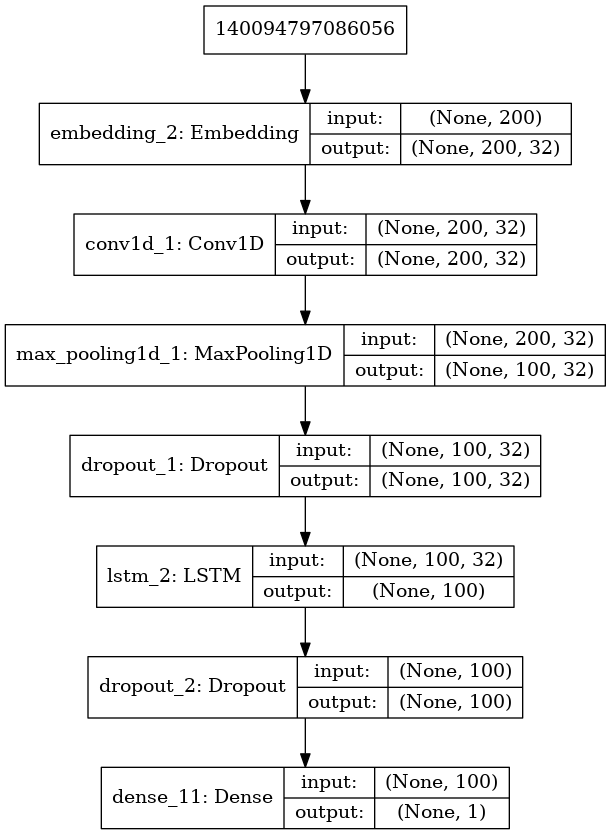

In [ ]:
from keras.layers.convolutional import Conv1D, MaxPooling1D

# GloVe + LSTM
clf = Sequential()
clf.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
clf.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
clf.add(MaxPooling1D(pool_size=2))
clf.add(Dropout(0.2))
clf.add(LSTM(100))
clf.add(Dropout(0.2))
clf.add(Dense(1, activation='sigmoid'))
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(clf.summary())
plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.5779 - acc: 0.6823 - val_loss: 0.3390 - val_acc: 0.8622
Epoch 2/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3008 - acc: 0.8754 - val_loss: 0.3012 - val_acc: 0.8724
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2538 - acc: 0.8995 - val_loss: 0.3027 - val_acc: 0.8712
Epoch 4/10
 5200/20000 [======>.......................] - ETA: 29s - loss: 0.2041 - acc: 0.9225

20000/20000 [==============================] - 42s 2ms/step - loss: 0.2238 - acc: 0.9127 - val_loss: 0.3218 - val_acc: 0.8714
Epoch 5/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2062 - acc: 0.9208 - val_loss: 0.3584 - val_acc: 0.8642
Epoch 6/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1945 - acc: 0.9253 - val_loss: 0.3252 - val_acc: 0.8724
Epoch 7/10
14000/20000 [====================>.........] - ETA: 11s - loss: 0.1708 - acc: 0.9349

20000/20000 [==============================] - 42s 2ms/step - loss: 0.1796 - acc: 0.9305 - val_loss: 0.3249 - val_acc: 0.8702
Epoch 8/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1601 - acc: 0.9403 - val_loss: 0.3355 - val_acc: 0.8694
Epoch 9/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1502 - acc: 0.9457 - val_loss: 0.3364 - val_acc: 0.8536
Epoch 10/10
15400/20000 [======================>.......] - ETA: 9s - loss: 0.1360 - acc: 0.9523

20000/20000 [==============================] - 42s 2ms/step - loss: 0.1397 - acc: 0.9506 - val_loss: 0.3975 - val_acc: 0.8618


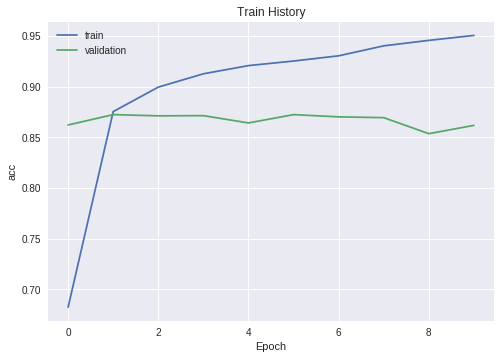

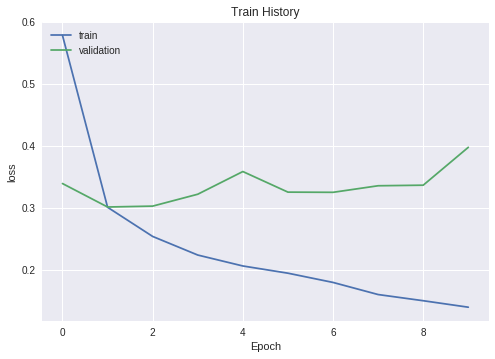

25000/25000 [==============================] - 19s 748us/step
Accuracy of testing data = 85.9%


In [ ]:
history = clf.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=200,
                    epochs=10, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = clf.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))